In [27]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

import os
from collections import defaultdict

In [34]:
def set_paramters (filepath):
    with open(filepath) as file:
        for line in file:
            if line.startswith("#m="):
                global m
                m = float(line.strip()[3:])
            elif line.startswith("#A="):
                global a
                a = int(line.strip()[3:])
            elif line.startswith("#H="):
                global h
                h = int(line.strip()[3:])
            elif line.startswith("#rH2="):
                global rh2
                rh2 = float(line.strip()[5:])
            elif line.startswith("#Rp2="):
                global rp2
                rp2 = float(line.strip()[5:])
            elif line.startswith("#RC2="):
                global rc2
                rc2 = float(line.strip()[5:])
            else:
                break



def set_parameters_manually (m_, a_, h_, rh_sqr_, rp_sqr_, rc_sqr_):
    global m
    m = m_
    
    global a
    a = a_
    
    global h
    h = h_

    global rh2
    rh2 = rh_sqr_

    global rp2
    rp2 = rp_sqr_

    global rc2
    rc2 = rc_sqr_



def files_with_same_parameters (directory):
    matching_files = list()
    for filename in os.listdir(directory):
        with open(directory+filename, 'r') as file:
            for line in file:
                if line.startswith("#m="):
                    if (m != float(line.strip()[3:])):
                        break
                elif line.startswith("#A="):
                    if (a != int(line.strip()[3:])):
                        break
                elif line.startswith("#H="):
                    if (h != int(line.strip()[3:])):
                        break
                elif line.startswith("#rH2="):
                    if (rh2 != float(line.strip()[5:])):
                        break
                elif line.startswith("#Rp2="):
                    if (rp2 != float(line.strip()[5:])):
                        break
                elif line.startswith("#RC2="):
                    if (rc2 != float(line.strip()[5:])):
                        break
                elif line.startswith("##"):
                    matching_files.append(directory+filename)
                    break
    return matching_files



def find_different_q_values (q_all):
    q_values = []
    for q in q_all[0]:
        if q not in q_values:
            q_values.append(q)
    
    return q_values



def find_differnt_delta_values (delta_all):
    delta_values = []
    for delta in delta_all[0]:
        if delta not in delta_values:
            delta_values.append(delta)
    
    return delta_values



def read_data_from_files (file_list):
    print(f"Reading from {len(file_list)} files")

    delta_all = []
    q_all = []
    a_real_all = []
    a_imag_all = []
    a2_all = []

    # Loop through each file in the directory
    for filename in file_list:
        delta_array = []
        q_array = []
        a_real_array = []
        a_imag_array = []
        a2_array = []

        with open(filename, 'r') as file:
            # Read data from the file and store it in the dictionary
            for line in file:
                if (line == "\n"):
                    continue
                if (line.startswith("#")):  # Skip lines starting with #
                    continue
                else:
                    delta, q, a_real, a_imag, a2 = map(float, line.strip().split(" "))

                    delta_array.append(delta)
                    q_array.append(q)
                    a_real_array.append(a_real)
                    a_imag_array.append(a_imag)
                    a2_array.append(a2)
        
        delta_all.append(delta_array)
        q_all.append(q_array)
        a_real_all.append(a_real_array)
        a_imag_all.append(a_imag_array)
        a2_all.append(a2_array)
    
    len_store = len(q_all[0])
    #checking if Q values are the same for all files

    for q_vals in q_all:
        if len(q_vals) != len_store:
            print("Some files do not have the same number of data points (Q)!")
            exit()

    for q_index in range( len(q_all[0]) ):
        q_store = q_all[0][q_index]
        for event_index in range( len(q_all) ):
            if q_store != q_all[event_index][q_index]:
                print("Q values are not the same for some of the files!")
                exit()

    for delta_vals in delta_all:
        if len(delta_vals) != len_store:
            print("Some files do not have the same number of data points (Delta)!")
            exit()

    for delta_index in range( len(delta_all[0]) ):
        delta_store = delta_all[0][delta_index]
        for event_index in range( len(delta_all) ):
            if delta_store != delta_all[event_index][delta_index]:
                print("Delta values are not the same for some of the files!")
                exit()

    all_dict = {
                'Delta':delta_all,
                'Q':q_all,
                'A_real':a_real_all,
                'A_imag':a_imag_all,
                'A2':a2_all
            }
    
    return all_dict



def calculate_cs (q_all, delta_all, all_dict):
    cs_results = []

    q_values = find_different_q_values(q_all)
    delta_values = find_differnt_delta_values(delta_all)

    num_events = len(all_dict['Delta'])
    num_values = len(all_dict['Delta'][0])

    key_index = 0
    for q in q_values:
        for delta in delta_values:
            a_real_avg_of_sqrs = 0.0
            a_imag_avg_of_sqrs = 0.0

            a_real_sqr_of_avgs = 0.0
            a_imag_sqr_of_avgs = 0.0

            a2_avg = 0.0

            a_real_avg_of_sqrs_stddev = 0.0
            a_imag_avg_of_sqrs_stddev = 0.0

            a_real_sqr_of_avgs_stddev = 0.0
            a_imag_sqr_of_avgs_stddev = 0.0

            a2_avg_stddev = 0.0

            for value_index in range(num_values):
                # calculating the averages
                for event_index in range(num_events):
                    if q==all_dict['Q'][event_index][value_index] and delta==all_dict['Delta'][event_index][value_index]:
                        a_real_avg_of_sqrs += np.square(all_dict['A_real'][event_index][value_index])/float(num_events)
                        a_imag_avg_of_sqrs += np.square(all_dict['A_imag'][event_index][value_index])/float(num_events)

                        a_real_sqr_of_avgs += all_dict['A_real'][event_index][value_index]/float(num_events)
                        a_imag_sqr_of_avgs += all_dict['A_imag'][event_index][value_index]/float(num_events)

                        a2_avg += all_dict['A2'][event_index][value_index]/float(num_events)

            a_real_sqr_of_avgs *= a_real_sqr_of_avgs
            a_imag_sqr_of_avgs *= a_imag_sqr_of_avgs

            for value_index in range(num_values):
                # calculating the std devs
                for event_index in range(num_events):
                    if q==all_dict['Q'][event_index][value_index] and delta==all_dict['Delta'][event_index][value_index]:
                        a_real_avg_of_sqrs_stddev += np.square( np.square(all_dict['A_real'][event_index][value_index]) - a_real_avg_of_sqrs ) / float(num_events)
                        a_imag_avg_of_sqrs_stddev += np.square( np.square(all_dict['A_imag'][event_index][value_index]) - a_imag_avg_of_sqrs ) / float(num_events)
                        
                        a_real_sqr_of_avgs_stddev += np.square( np.square(all_dict['A_real'][event_index][value_index]) - a_real_sqr_of_avgs ) / float(num_events)
                        a_imag_sqr_of_avgs_stddev += np.square( np.square(all_dict['A_imag'][event_index][value_index]) - a_imag_sqr_of_avgs ) / float(num_events)

Reading from 16 files
Values of Q: [0.3162278]
Ne=16


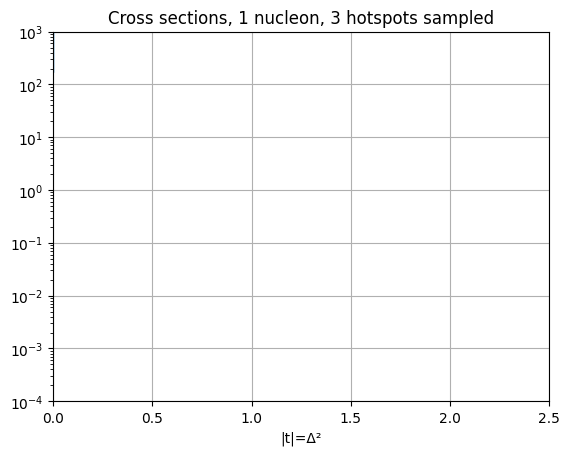

finished


In [29]:
# Define the directory where your files are located
dense_or_dilute = 'dilute/'
directory = '../Data/raw/' + dense_or_dilute

#set_paramters("../Data/3651184495_Amplitude.dat")
set_parameters_manually(0.22, 1, 3, 0.7, 3.3, 2.9)
file_list = files_with_same_parameters(directory)
print(file_list)

# the _all arrays contain N_e arrays (where N_e is the number of different runs) and the inner arrays contain the results for different delta and Q of the same run
all_dict = read_data_from_files(file_list)
cs_results = calculate_cs(all_dict)


t_results = []

a_co_real_results_Q1 = []
a_co_real_err_results_Q1 = []

a_co_imag_results_Q1 = []
a_co_imag_err_results_Q1 = []

a2_inco_results_Q1 = []
a2_inco_err_results_Q1 = []

a_co_real_results_Q2 = []
a_co_real_err_results_Q2 = []

a_co_imag_results_Q2 = []
a_co_imag_err_results_Q2 = []

a2_inco_results_Q2 = []
a2_inco_err_results_Q2 = []

data_Q1 = []

Ne = len(delta_all)
print(f"Ne={Ne}")

for i in range(len(delta_all[0])): # iterating through the different values of delta
    A_real_sqr_of_avgs = 0.0
    A_real_avg_of_sqrs= 0.0
    
    A_imag_sqr_of_avgs = 0.0
    A_imag_avg_of_sqrs= 0.0

    A2_avg = 0.0

    a_co_real_stddev = 0.0
    a_co_imag_stddev = 0.0
    a2_inco_stddev = 0.0
    for run in range(Ne):
        a_co_real_avg += a_co_real_all[run][i]/float(Ne)
        a_co_imag_avg += a_co_imag_all[run][i]/float(Ne)
        a2_inco_avg += a2_inco_all[run][i]/float(Ne)

    for run in range(Ne):
        a_co_real_stddev += np.square( a_co_real_all[run][i]-a_co_real_avg )
        a_co_imag_stddev += np.square( a_co_imag_all[run][i]-a_co_imag_avg )
        a2_inco_stddev += np.square( a2_inco_all[run][i]-a2_inco_avg )

    a_co_real_stddev = np.sqrt( a_co_real_stddev/float(Ne) )
    a_co_imag_stddev = np.sqrt( a_co_imag_stddev/float(Ne) )
    a2_inco_stddev = np.sqrt( a2_inco_stddev/float(Ne) )

    if (q_all[0][i] == q1):
        t_results.append(delta_all[0][i]*delta_all[0][i])

        a_co_real_results_Q1.append(a_co_real_avg*a_co_real_avg)
        a_co_real_err_results_Q1.append( np.abs(2.0*a_co_real_avg*a_co_real_stddev) )

        a_co_imag_results_Q1.append(a_co_imag_avg*a_co_imag_avg)
        a_co_imag_err_results_Q1.append( np.abs(2.0*a_co_imag_avg*a_co_imag_stddev) )

        a2_inco_results_Q1.append(a2_inco_avg)
        a2_inco_err_results_Q1.append(a2_inco_stddev)

    else: # if q == q2
        a_co_real_results_Q2.append(a_co_real_avg*a_co_real_avg)
        a_co_real_err_results_Q2.append( np.abs(2.0*a_co_real_avg*a_co_real_stddev) )
        
        a_co_imag_results_Q2.append(a_co_imag_avg*a_co_imag_avg)
        a_co_imag_err_results_Q2.append( np.abs(2.0*a_co_imag_avg*a_co_imag_stddev) )
        
        a2_inco_results_Q2.append(a2_inco_avg)
        a2_inco_err_results_Q2.append(a2_inco_stddev)

cs_results = []
cs_results_Q1 = []
cs_results_Q2 = []

cs_results_Q1.append(t_results)

cs_results_Q1.append(a_co_real_results_Q1)
cs_results_Q1.append(a_co_real_err_results_Q1)

cs_results_Q1.append(a_co_imag_results_Q1)
cs_results_Q1.append(a_co_imag_err_results_Q1)

cs_results_Q1.append(a2_inco_results_Q1)
cs_results_Q1.append(a2_inco_err_results_Q1)


cs_results_Q2.append(t_results)

cs_results_Q2.append(a_co_real_results_Q2)
cs_results_Q2.append(a_co_real_err_results_Q2)

cs_results_Q2.append(a_co_imag_results_Q2)
cs_results_Q2.append(a_co_imag_err_results_Q2)

cs_results_Q2.append(a2_inco_results_Q2)
cs_results_Q2.append(a2_inco_err_results_Q2)

cs_results.append(cs_results_Q1)
cs_results.append(cs_results_Q2)

#for i in range(len(cs_results[0][0])):
#    print(cs_results[0][0][i], cs_results[0][1][i], cs_results[0][2][i], cs_results[0][3][i])

plt.title("Cross sections, 1 nucleon, 3 hotspots sampled")
plt.yscale('log')
plt.xlabel('|t|=Δ²')
plt.grid()
plt.xlim(0, 2.5)
plt.ylim(1.0e-4, 1.0e3)
plt.errorbar(cs_results[0][0], cs_results[0][5])
#plt.semilogy(cs_results[0][0], cs_results[0][3])
plt.show()

out_file = '../Data/dsigmadt_BG_29_m_022_A_1_H_3.dat'
with open(out_file, 'w') as file:
    file.write(f"#m={m}\n"
                f"#A={a}\n"
                f"#NH={nh}\n"
                f"#rH2={rh2}\n"
                f"#Rp2={rp2}\n"
                f"#RC2={rc2}\n")
    for i in range( len(cs_results[0][0]) ):
        file.write(f"{cs_results[0][0][i]} {cs_results[0][1][i]} {cs_results[0][2][i]} {cs_results[0][3][i]} {cs_results[0][4][i]} {cs_results[0][5][i]} {cs_results[0][6][i]}\n") # Q1 results
    #file.write("\n\n")
    #for i in range( len(cs_results[1][0]) ):
    #    file.write(f"{cs_results[1][0][i]} {cs_results[1][1][i]} {cs_results[1][2][i]} {cs_results[1][3][i]} {cs_results[1][4][i]} {cs_results[1][5][i]} {cs_results[1][6][i]}\n") # Q2 results

# Write the average data to a new file
#output_file = '/path/to/your/output/average.txt'
#with open(output_file, 'w') as file:
#    for t, average_value in average_dict.items():
#        file.write(f"{t}, {average_value}\n")
#print(f"Average data saved to {output_file}")

print("finished")

In [35]:
t_list = []
a_co_real_list = []

t_list.append(0.0)
a_co_real_list.append(1.0)

data_Q1_run = { 't':t_list, 'A':a_co_real_list }
data_Q2_run = { 't':t_list, 'A':a_co_real_list }

data = []
data.append( { 'Q1':data_Q1_run, 'Q2':data_Q2_run } )

print(data[0]['Q1']['t'][0])
print(data[0]['Q2']['A'][0])

yink = calculate_cs(None, None)
print(yink)

0.0
1.0
[{'0': 0}, {'1': 1}, {'2': 2}, {'3': 3}, {'4': 4}, {'5': 5}, {'6': 6}, {'7': 7}, {'8': 8}, {'9': 9}]
